In [1]:
# Let's start with a simple example of the scikit lib use

import sys
sys.path.append('./privatizers')
sys.path.append('./dataProviders')
sys.path.append('./adapters')

from sklearn import tree
from dataProviders import breastCancerDataProvider as dataProvider
from adapters import breastCancerAdapter as adapter

dp = dataProvider.BreastCancerDP()

X = dp.getAllData()
Y = dp.getAllTargets()


In [2]:
## Dataset
data_set = {
    'samples': X,
    'labels': Y
}



In [3]:
## Decision tree without privatization
clf = tree.DecisionTreeClassifier()
# clf = clf.fit(data_set['samples'], data_set['labels'])

tree.plot_tree(clf.fit(data_set['samples'], data_set['labels']))

[Text(302.25, 346.49999999999994, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(186.0, 300.29999999999995, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(85.25, 254.09999999999997, 'X[28] <= 0.157\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(69.75, 207.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(100.75, 207.89999999999998, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(62.0, 161.7, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(31.0, 115.5, 'X[21] <= 27.755\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(15.5, 69.30000000000001, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(46.5, 69.30000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(93.0, 115.5, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(77.5, 69.30000000000001, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(108.5, 69.30000000000001, 'X[21] <

In [4]:
## Privatization: Coin privatizer

# from privatizers import coinPrivatizer

# private_format = []

# for index, value in enumerate(data_set['samples']):
#     single_list = []
#     for num in value:
#         single_list.append(False if num == 0 else True)
#     single_list.append(False if data_set['labels'][index]==0 else True)
#     private_format.append(single_list)

# coin_privatizer = coinPrivatizer.CoinPrivatizer()
# private_format = coin_privatizer.privatize(private_format)

# private_data_set = {
#     'samples': [],
#     'labels': []
# }

# for value in private_format:
#     private_data_set['labels'].append(1 if value.pop() else 0)
#     single_list = []
#     for v in value:
#         single_list.append(1 if v else 0)
#     private_data_set['samples'].append(single_list)

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(private_data_set['samples'], private_data_set['labels'])

# tree.plot_tree(clf.fit(private_data_set['samples'], private_data_set['labels']))

[Text(207.75535714285715, 205.35999999999999, 'X[20] <= 16.801\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(140.49642857142857, 181.2, 'X[26] <= 0.304\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(89.67857142857143, 157.04, 'X[12] <= 6.615\ngini = 0.031\nsamples = 313\nvalue = [5, 308]'),
 Text(77.72142857142858, 132.88, 'X[27] <= 0.16\ngini = 0.025\nsamples = 312\nvalue = [4, 308]'),
 Text(47.82857142857143, 108.72, 'X[10] <= 0.654\ngini = 0.013\nsamples = 300\nvalue = [2, 298]'),
 Text(23.914285714285715, 84.56, 'X[23] <= 785.716\ngini = 0.007\nsamples = 296\nvalue = [1, 295]'),
 Text(11.957142857142857, 60.400000000000006, 'gini = 0.0\nsamples = 278\nvalue = [0, 278]'),
 Text(35.871428571428574, 60.400000000000006, 'X[22] <= 102.622\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(23.914285714285715, 36.24000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(47.82857142857143, 36.24000000000001, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Te

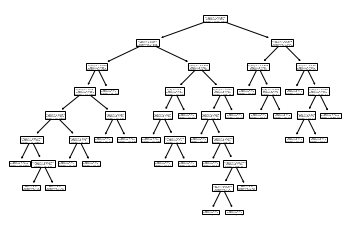

In [5]:
## Privatization: Laplace privatizer
from privatizers import laplacePrivatizer

scale = 0.03
privatizer = laplacePrivatizer.LaplacePrivatizer(scale)
privateData = privatizer.privatize(adapter.fromRaw(data_set['samples']))

privateTargetsFloat = privatizer.privatize(adapter.fromRaw(data_set['labels']))
privateTargets = adapter.toBinaryInt(privateTargetsFloat)

clf = tree.DecisionTreeClassifier()
tree.plot_tree(clf.fit(privateData, privateTargets))

[Text(222.98203125, 207.55636363636364, 'X[20] <= 16.827\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(163.4765625, 187.7890909090909, 'X[26] <= 0.441\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(117.703125, 168.0218181818182, 'X[22] <= 105.979\ngini = 0.067\nsamples = 344\nvalue = [12, 332]'),
 Text(88.93125, 148.25454545454545, 'X[12] <= 6.606\ngini = 0.036\nsamples = 323\nvalue = [6, 317]'),
 Text(78.46875, 128.48727272727274, 'X[27] <= 0.195\ngini = 0.031\nsamples = 322\nvalue = [5, 317]'),
 Text(52.3125, 108.72, 'X[13] <= 48.992\ngini = 0.019\nsamples = 312\nvalue = [3, 309]'),
 Text(31.387500000000003, 88.95272727272729, 'X[21] <= 31.679\ngini = 0.013\nsamples = 309\nvalue = [2, 307]'),
 Text(20.925, 69.18545454545455, 'gini = 0.0\nsamples = 278\nvalue = [0, 278]'),
 Text(41.85, 69.18545454545455, 'X[4] <= 0.158\ngini = 0.121\nsamples = 31\nvalue = [2, 29]'),
 Text(31.387500000000003, 49.418181818181836, 'X[15] <= 0.015\ngini = 0.064\nsamples = 30\nvalue =

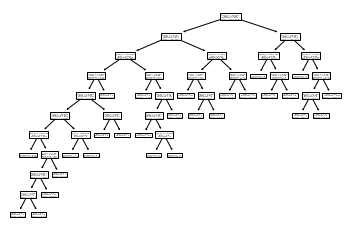

In [6]:
## Privatization: Exponential privatizer
from privatizers import exponentialPrivatizer

scale = 0.03
privatizer = exponentialPrivatizer.ExponentialPrivatizer(scale)
privateData = privatizer.privatize(adapter.fromRaw(data_set['samples']))

privateTargetsFloat = privatizer.privatize(adapter.fromRaw(data_set['labels']))
privateTargets = adapter.toBinaryInt(privateTargetsFloat)

clf = tree.DecisionTreeClassifier()

tree.plot_tree(clf.fit(privateData, privateTargets))